In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
from scipy.interpolate import interpn
import cmocean as cm
import matplotlib.colors as colors
import math
from matplotlib.gridspec import GridSpec

## import data

In [3]:
# summary data already has all the info you need for what your're using
up =  pd.concat([pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2013.csv').assign(year=2013),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2014.csv').assign(year=2014),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2015.csv').assign(year=2015),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2016.csv').assign(year=2016),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2017.csv').assign(year=2017),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2018.csv').assign(year=2018),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2019.csv').assign(year=2019),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2020.csv').assign(year=2020),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2021.csv').assign(year=2021),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2022.csv').assign(year=2022),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/up_2023.csv').assign(year=2023)])

dw = pd.concat([pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2014.csv').assign(year=2014),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2015.csv').assign(year=2015),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2016.csv').assign(year=2016),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2017.csv').assign(year=2017),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2018.csv').assign(year=2018),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2019.csv').assign(year=2019),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2020.csv').assign(year=2020),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2021.csv').assign(year=2021),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2022.csv').assign(year=2022),
        pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/down_2023.csv').assign(year=2023)])


In [4]:
# all the data (not sorted into sources)
updata = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/upwellingdata.csv')
dwdata = pd.read_csv('/data1/bbeutel/LO_user/ariane/summary_files/downwellingdata.csv')


In [5]:
# length of difffernet periods in days
lup = [219, 161, 144, 158, 156,128,193,244,189, 117,136] 
ldw = [113,143, 149, 198, 91, 163, 53, 82, 105,176]

In [6]:
updata.head()

,Unnamed: 0,year,section,depth,lon,lat,transport,salt,temperature,NO3,DO,TA,DIC
0,0,2013.0,0.0,12.522161,-124.379045,48.293956,26.206773,29.139933,7.992830,12.914421,290.669708,2113.837402,1976.673462
1,1,2013.0,0.0,25.202893,-124.379045,48.297176,69.694170,29.316879,7.836041,16.807518,283.115295,2116.144775,2000.621826
2,2,2013.0,0.0,4.563025,-124.379045,48.325483,36.442395,28.625412,7.993061,9.992110,307.096863,2093.907715,1939.443481
3,3,2013.0,0.0,13.537883,-124.379045,48.290274,40.103976,28.676762,8.040707,11.207986,300.486847,2094.389648,1949.883667
4,4,2013.0,0.0,30.177724,-124.379045,48.298656,55.086125,29.962944,7.780801,19.743525,266.137146,2144.134033,2042.130737


In [7]:
def round_to_2(x):
    return np.round(x, -int(math.floor(math.log10(abs(x))))+1)

def round_to_3(x):
    return np.round(x, -int(math.floor(math.log10(abs(x))))+2)

mymesh = xr.open_dataset('/data1/bbeutel/LO_output/grid/grid_cas7.nc')
def FluxEW_ROMS(mydata, boolean,y, xmin, xmax, days, ax):
    
    units = '$m^3 \, s^{-1} m^{-2}$'
    m2lon=1.6691435255493834*(10**-5)
    maxdepth = 500

    time = np.sum(days)*24

    cmap = cm.cm.speed
    cmap.set_under('white')
    
    depths = mydata.depth[boolean]
    transports = mydata.transport[boolean]/time
    lons = mydata.lon[boolean]
    
    t_min = 0.000000000001
    tick = 0.01
    t_max = (tick/np.sum(transports))/m2lon
        
    H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(mymesh.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(mymesh.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, vmin = t_min, vmax=t_max, density= True)
    
    # cb1 = fig.colorbar(im, ax=ax)
    # cb1.set_ticks([0, t_max])
    # cb1.set_ticklabels([0, tick])
    # cb1.set_label(units, labelpad=-20)

    ax.fill_between(mymesh.lon_rho[y,xmin-1:xmax+1],mymesh.h[y,xmin-1:xmax+1], 500, color='lightgray')

    ax.invert_yaxis()
    ax.set_xticks([mymesh.lon_rho[y,xmin+2], mymesh.lon_rho[y,xmax-2]])
    ax.set_xticklabels(np.round([mymesh.lon_rho[y,xmin+2], mymesh.lon_rho[y,xmax-2]],2))
    ax.set_xlim((mymesh.lon_rho[y,xmin], mymesh.lon_rho[y,xmax]))
    ax.set_ylim((maxdepth, 0))
    # full_title = str(round_to_2(np.sum(transports)))[:-2]+" "+units
    # ax.set_title(str(full_title))

## south water masses

In [8]:
########################
# TS DIAGRAM FUNCTIONS #
########################

# I want to add lines of constant spice
smin, smax = 26,34.6
tmin, tmax = 4,15
bins = [np.linspace(smin, smax,100),np.linspace(tmin, tmax,100)]
SA, t = np.meshgrid(bins[0],bins[1])
p = np.array([50 for i in range(np.shape(SA)[0]*np.shape(SA)[1])])
p = p.reshape(100,100)

CT = np.zeros(np.shape(p))
rho = np.zeros(np.shape(p))
spice = np.zeros(np.shape(p))

for i in range(np.shape(p)[0]): 
    CT[i,:] = gsw.CT_from_t(SA[i,:],t[i,:],p[i,:])
    rho[i,:] = gsw.rho_alpha_beta(SA[i,:], CT[i,:], p[i,:])[0]
    spice[i,:] = gsw.spiciness0(SA[i,:], CT[i,:])

def fmt(x):
    x-=1000
    s = f"{x:.0f}"
    return rf"{s}"

        

def TS_depth(df,ax):
    smin, smax = 28.2,36.6
    tmin, tmax = 1,19.6

    salt = df['salinity (g kg-1)'].reset_index(drop=True)
    temp = df['temperature (degC)'].reset_index(drop=True)
    z = df['depth (m)'].reset_index(drop=True)

    # Sort the points by depth, so that the deepest points are plotted last
    idx = z.argsort()
    salt, temp, z = salt[idx], temp[idx], z[idx]
                    
    sc = ax.scatter(salt,temp, c=z, cmap=cm.cm.deep,s=1,vmin=0,vmax=500)
    cb = fig.colorbar(sc, ax=ax)
    cb.set_label('Depth [m]', labelpad=10, fontsize=14)

    ax.set_ylabel('Temperature')
    ax.set_xlabel('Salinity')

    ax.set_ylim([tmin,tmax])
    ax.set_xlim([smin,smax])

    # density
    CS=ax.contour(SA,t,rho,colors = 'gray', alpha=0.5)
    ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

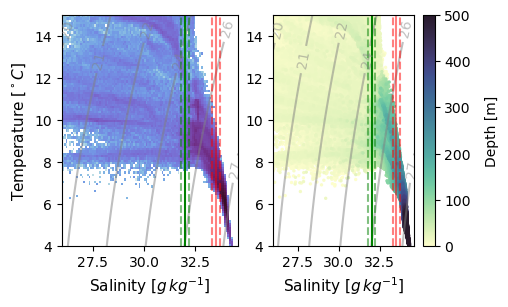

In [9]:
fig, ax = plt.subplots(1,2, figsize=(5,3))
salt, temp, trans, depth = updata[updata.section == 2].salt.reset_index(drop=True), updata[updata.section == 2].temperature.reset_index(drop=True), updata[updata.section == 2].transport.reset_index(drop=True), updata[updata.section == 2].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(26,34.6,100),np.linspace(4,15.01,100)]

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=100000000))
ax[0].set_ylabel('Temperature [$^\circ C$]', fontsize=11)

# then coloured by depth
cmap = cm.cm.deep
idx = depth.argsort()
salt, temp, depth = salt[idx], temp[idx], depth[idx]
sc=ax[1].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=500)
cb = fig.colorbar(sc, ax=ax[1])
cb.set_label('Depth [m]', labelpad=10, fontsize=10)


# add lines to show cutoff
for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=11)
    axs.set_ylim([np.min(bins[1]),np.max(bins[1])])
    axs.set_xlim([np.min(bins[0]),np.max(bins[0])])

    CS=axs.contour(SA,t,rho,colors = 'gray', alpha=0.5)
    axs.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
    axs.set_ylim([np.min(bins[1]),np.max(bins[1])])
    axs.set_xlim([np.min(bins[0]),np.max(bins[0])])

    axs.plot([33.5,33.5],[np.min(bins[1]),np.max(bins[1])],'r',alpha=0.5)
    axs.plot([33.5-0.2,33.5-0.2],[np.min(bins[1]),np.max(bins[1])],'r--',alpha=0.5)
    axs.plot([33.5+0.2,33.5+0.2],[np.min(bins[1]),np.max(bins[1])],'r--',alpha=0.5)

    axs.plot([32,32],[np.min(bins[1]),np.max(bins[1])],'g')
    axs.plot([32-0.2,32-0.2],[np.min(bins[1]),np.max(bins[1])],'g--',alpha=0.5)
    axs.plot([32+0.2,32+0.2],[np.min(bins[1]),np.max(bins[1])],'g--',alpha=0.5)

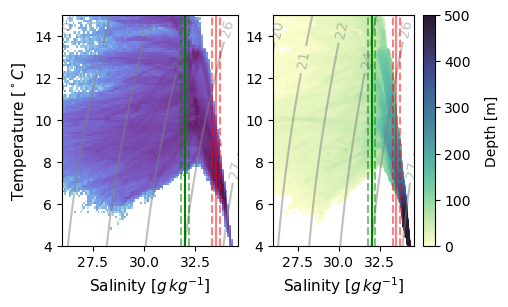

In [10]:
# and for downwelling 
fig, ax = plt.subplots(1,2, figsize=(5,3))
salt, temp, trans, depth = dwdata[dwdata.section == 2].salt.reset_index(drop=True), dwdata[dwdata.section == 2].temperature.reset_index(drop=True), dwdata[dwdata.section == 2].transport.reset_index(drop=True), dwdata[dwdata.section == 2].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(26,34.6,100),np.linspace(4,15.01,100)]

H, xedges, yedges=np.histogram2d(salt,temp,weights=trans,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=10, vmax=100000000))
ax[0].set_ylabel('Temperature [$^\circ C$]', fontsize=11)

# then coloured by depth
cmap = cm.cm.deep
idx = depth.argsort()
salt, temp, depth = salt[idx], temp[idx], depth[idx]
sc=ax[1].scatter(salt,temp,c=depth, cmap=cmap,s=2, vmin=0, vmax=500)
cb = fig.colorbar(sc, ax=ax[1])
cb.set_label('Depth [m]', labelpad=10, fontsize=10)


# add lines to show cutoff
for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=11)
    axs.set_ylim([np.min(bins[1]),np.max(bins[1])])
    axs.set_xlim([np.min(bins[0]),np.max(bins[0])])

    CS=axs.contour(SA,t,rho,colors = 'gray', alpha=0.5)
    axs.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
    axs.set_ylim([np.min(bins[1]),np.max(bins[1])])
    axs.set_xlim([np.min(bins[0]),np.max(bins[0])])

    axs.plot([33.5,33.5],[np.min(bins[1]),np.max(bins[1])],'r',alpha=0.5)
    axs.plot([33.5-0.2,33.5-0.2],[np.min(bins[1]),np.max(bins[1])],'r--',alpha=0.5)
    axs.plot([33.5+0.2,33.5+0.2],[np.min(bins[1]),np.max(bins[1])],'r--',alpha=0.5)

    axs.plot([32,32],[np.min(bins[1]),np.max(bins[1])],'g')
    axs.plot([32-0.2,32-0.2],[np.min(bins[1]),np.max(bins[1])],'g--',alpha=0.5)
    axs.plot([32+0.2,32+0.2],[np.min(bins[1]),np.max(bins[1])],'g--',alpha=0.5)

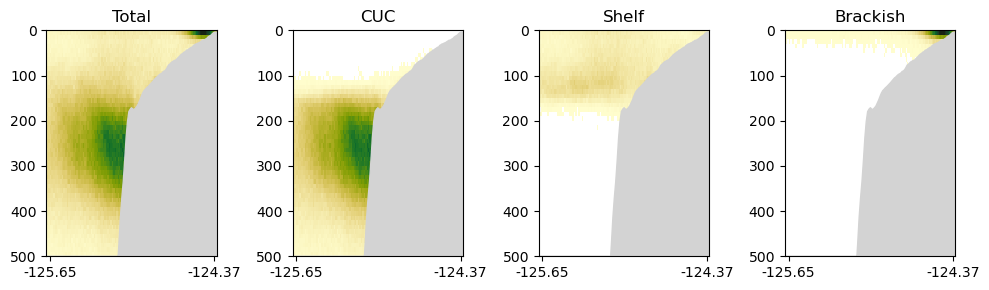

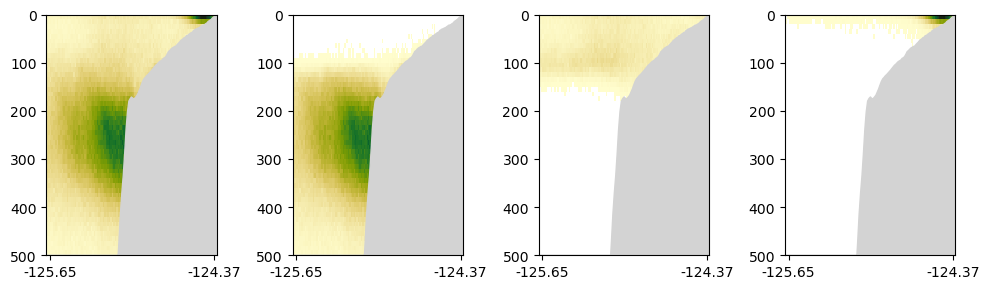

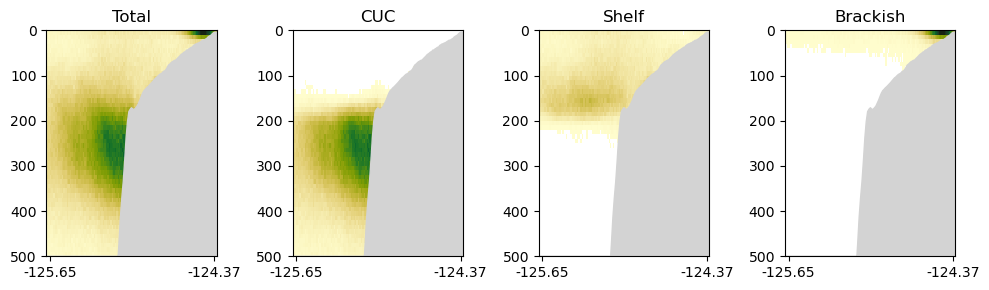

In [11]:
# location of cores of flow 
# UPWELLING
y = 744
xmin=192
xmax=317

############
# original #
############
figure, ax = plt.subplots(1,4,figsize=(10,3))
boolean = (updata.section == 2) #for all south
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[0])
ax[0].set_title('Total')

#try cuc delineation
boolean = (updata.section == 2) & (updata.salt >= 33.5)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[1])
ax[1].set_title('CUC')

#and south delineation
boolean = (updata.section == 2) & (updata.salt < 33.5) & (updata.salt >= 32)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[2])
ax[2].set_title('Shelf')

#and fresh delineation
boolean = (updata.section == 2) & (updata.salt < 32)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[3])
ax[3].set_title('Brackish')
plt.tight_layout()

#############
# minus 0.2 #
#############
figure, ax = plt.subplots(1,4,figsize=(10,3))
boolean = (updata.section == 2) #for all south
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[0])

#try cuc delineation
boolean = (updata.section == 2) & (updata.salt >= 33.5-0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[1])

#and south delineation
boolean = (updata.section == 2) & (updata.salt < 33.5-0.2) & (updata.salt >= 32-0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[2])

#and fresh delineation
boolean = (updata.section == 2) & (updata.salt < 32-0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[3])
plt.tight_layout()

############
# plus 0.2 #
############
figure, ax = plt.subplots(1,4,figsize=(10,3))
boolean = (updata.section == 2) #for all south
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[0])
ax[0].set_title('Total')

#try cuc delineation
boolean = (updata.section == 2) & (updata.salt >= 33.5+0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[1])
ax[1].set_title('CUC')

#and south delineation
boolean = (updata.section == 2) & (updata.salt < 33.5+0.2) & (updata.salt >= 32+0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[2])
ax[2].set_title('Shelf')

#and fresh delineation
boolean = (updata.section == 2) & (updata.salt < 32+0.2)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax[3])
ax[3].set_title('Brackish')
plt.tight_layout()


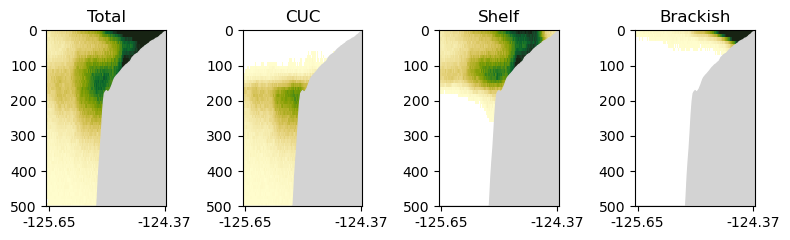

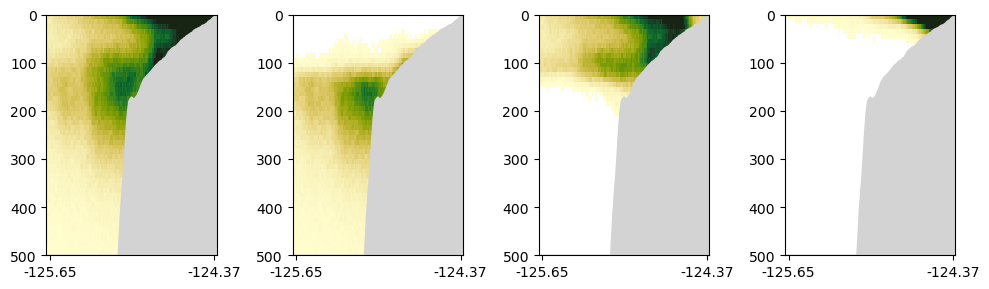

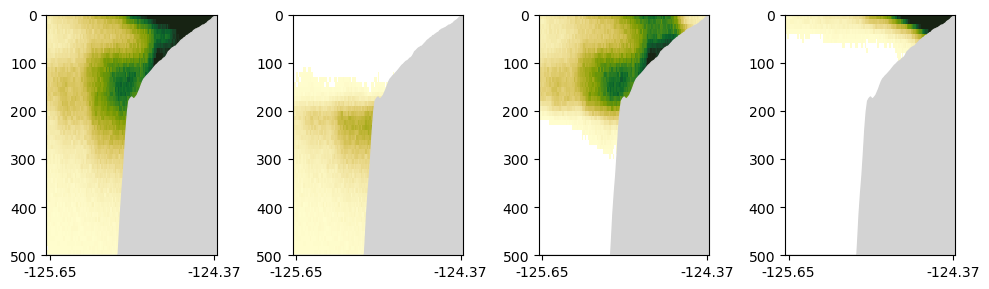

In [12]:
# location of cores of flow 
# dwWELLING
y = 744
xmin=192
xmax=317

############
# original #
############
figure, ax = plt.subplots(1,4,figsize=(8,2.5))
boolean = (dwdata.section == 2) #for all south
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[0])
ax[0].set_title('Total')

#try cuc delineation
boolean = (dwdata.section == 2) & (dwdata.salt >= 33.5)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[1])
ax[1].set_title('CUC')

#and south delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 33.5) & (dwdata.salt >= 32)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[2])
ax[2].set_title('Shelf')

#and fresh delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 32)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[3])
ax[3].set_title('Brackish')
plt.tight_layout()

#############
# minus 0.2 #
#############
figure, ax = plt.subplots(1,4,figsize=(10,3))
boolean = (dwdata.section == 2) #for all south
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[0])

#try cuc delineation
boolean = (dwdata.section == 2) & (dwdata.salt >= 33.5-0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[1])

#and south delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 33.5-0.2) & (dwdata.salt >= 32-0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[2])

#and fresh delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 32-0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[3])
plt.tight_layout()

############
# plus 0.2 #
############
figure, ax = plt.subplots(1,4,figsize=(10,3))
boolean = (dwdata.section == 2) #for all south
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[0])

#try cuc delineation
boolean = (dwdata.section == 2) & (dwdata.salt >= 33.5+0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[1])

#and south delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 33.5+0.2) & (dwdata.salt >= 32+0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[2])

#and fresh delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 32+0.2)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax[3])
plt.tight_layout()


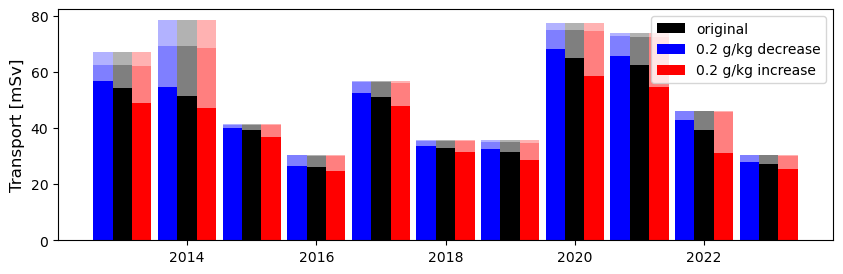

In [13]:
# annual transport from each watermass based on the three divisions
# upwelling
years = np.array(list(set(up.year)))
cuc = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
cucpls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
cucneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

she = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32)&(updata.salt < 33.5)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shepls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32+0.2)&(updata.salt < 33.5+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
sheneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32-0.2)&(updata.salt < 33.5-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

fre = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
frepls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
freneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,cuc,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax.bar(years,she,width=0.3,color='k',alpha=0.5,bottom=cuc,zorder=2)
ax.bar(years,fre,width=0.3,color='k',alpha=0.3,bottom=np.sum([she,cuc],axis=0),zorder=2)

ax.bar(years-0.3,cucneg,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax.bar(years-0.3,sheneg,width=0.3,color='b',alpha=0.5,bottom=cucneg,zorder=2)
ax.bar(years-0.3,freneg,width=0.3,color='b',alpha=0.3,bottom=np.sum([sheneg,cucneg],axis=0),zorder=2)

ax.bar(years+0.3,cucpls,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax.bar(years+0.3,shepls,width=0.3,color='r',alpha=0.5,bottom=cucpls,zorder=2)
ax.bar(years+0.3,frepls,width=0.3,color='r',alpha=0.3,bottom=np.sum([shepls,cucpls],axis=0),zorder=2)

# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.legend()

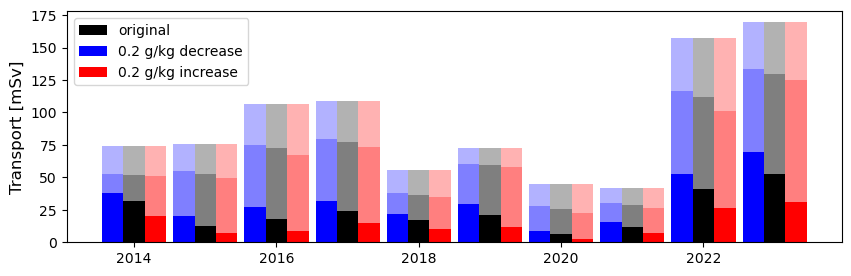

In [14]:
# annual transport from each watermass based on the three divisions
# downwelling
years = np.array(list(set(dw.year)))
cuc = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
cucpls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
cucneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

she = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32)&(dwdata.salt < 33.5)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shepls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32+0.2)&(dwdata.salt < 33.5+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
sheneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32-0.2)&(dwdata.salt < 33.5-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

fre = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
frepls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
freneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,cuc,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax.bar(years,she,width=0.3,color='k',alpha=0.5,bottom=cuc,zorder=2)
ax.bar(years,fre,width=0.3,color='k',alpha=0.3,bottom=np.sum([she,cuc],axis=0),zorder=2)

ax.bar(years-0.3,cucneg,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax.bar(years-0.3,sheneg,width=0.3,color='b',alpha=0.5,bottom=cucneg,zorder=2)
ax.bar(years-0.3,freneg,width=0.3,color='b',alpha=0.3,bottom=np.sum([sheneg,cucneg],axis=0),zorder=2)

ax.bar(years+0.3,cucpls,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax.bar(years+0.3,shepls,width=0.3,color='r',alpha=0.5,bottom=cucpls,zorder=2)
ax.bar(years+0.3,frepls,width=0.3,color='r',alpha=0.3,bottom=np.sum([shepls,cucpls],axis=0),zorder=2)

# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.legend()

In [15]:
# mSv change each year due to salinity definition
# total transport
tot = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
# print(tot)

# fresh division
print(np.mean((np.array(fre))))
print(np.mean((np.array(frepls)-np.array(fre))))
print(((np.array(frepls)-np.array(fre))/np.array(fre))*100)
print(np.mean((np.array(frepls)-np.array(fre))/np.array(fre))*100)


print(((np.array(fre)-np.array(freneg))/np.array(fre))*100)
print(np.mean((np.array(fre)-np.array(freneg))/np.array(fre))*100)
print('\n')
# south-fresh division
print(np.mean(np.array(she)))
print(((np.array(frepls)-np.array(fre))/np.array(she))*100)
print(np.mean((np.array(frepls)-np.array(fre))/np.array(she))*100)
print(((np.array(fre)-np.array(freneg))/np.array(she))*100)
print(np.mean((np.array(fre)-np.array(freneg))/np.array(she))*100)


26.14002285357512
3.799282241871621
[16.4362384  11.04137408 10.6794742  12.14767638 13.51271243 17.3092736
 23.53648182 13.35712037  4.54873655 14.3409441 ]
13.69100319221978
[ 7.60542742  7.02858727  8.04263908  9.38930565 12.18324631  9.6603933
 10.26719455  9.5681339   5.23661057  8.92083511]
8.790237316054753


40.965676577921954
[10.05180375  6.64414243 10.60475099  4.20400554 14.11406787 13.62414006
 15.24317531  6.79233951  4.98666952  8.22718911]
9.449228409617987
[ 4.65120194  4.22944957  7.98636555  3.24940275 12.72543659  7.6037016
  6.64944946  4.86557073  5.74076912  5.11775215]
6.281909946490376


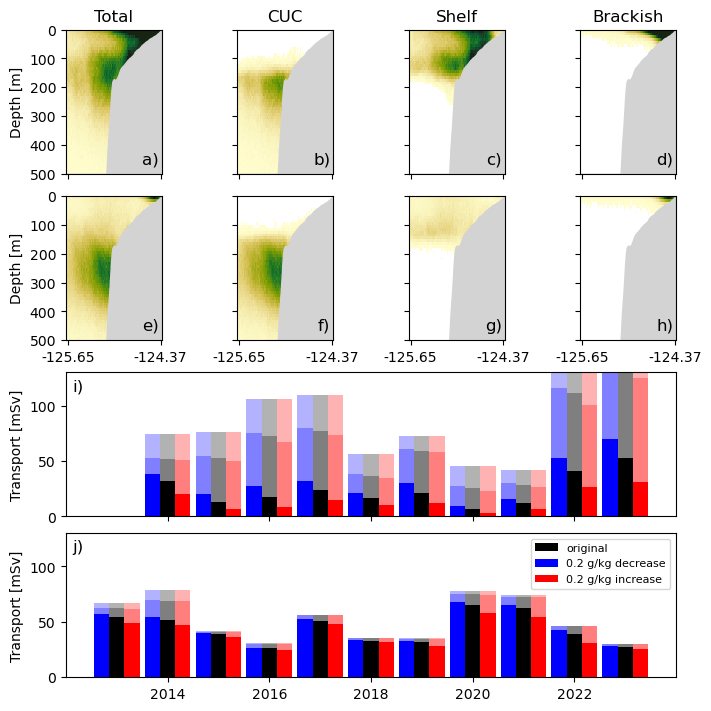

In [16]:
# one figure for paper 
fig = plt.figure(constrained_layout=True, figsize=[7,7])
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[2, :])
ax10 = fig.add_subplot(gs[3, :])


# location of cores of flow 
y = 744
xmin=192
xmax=317

###############
# Downwelling #
###############

boolean = (dwdata.section == 2) #for all south
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax1)
ax1.set_title('Total')
ax1.set_xticklabels([])
ax1.set_ylabel('Depth [m]')

#try cuc delineation
boolean = (dwdata.section == 2) & (dwdata.salt >= 33.5)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax2)
ax2.set_title('CUC')
ax2.set_xticklabels([])
ax2.set_yticklabels([])

#and south delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 33.5) & (dwdata.salt >= 32)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax3)
ax3.set_title('Shelf')
ax3.set_xticklabels([])
ax3.set_yticklabels([])

#and fresh delineation
boolean = (dwdata.section == 2) & (dwdata.salt < 32)
FluxEW_ROMS(dwdata, boolean, y, xmin, xmax, ldw, ax4)
ax4.set_title('Brackish')
ax4.set_xticklabels([])
ax4.set_yticklabels([])

#############
# Upwelling #
#############

boolean = (updata.section == 2) #for all south
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax5)
ax5.set_ylabel('Depth [m]')

#try cuc delineation
boolean = (updata.section == 2) & (updata.salt >= 33.5)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax6)
ax6.set_yticklabels([])

#and south delineation
boolean = (updata.section == 2) & (updata.salt < 33.5) & (updata.salt >= 32)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax7)
ax7.set_yticklabels([])

#and fresh delineation
boolean = (updata.section == 2) & (updata.salt < 32)
FluxEW_ROMS(updata, boolean, y, xmin, xmax, lup, ax8)
ax8.set_yticklabels([])

# annual transport from each watermass based on the three divisions
# downwelling
years = np.array(list(set(dw.year)))
cuc = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
cucpls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
cucneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >=33.5-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

she = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32)&(dwdata.salt < 33.5)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shepls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32+0.2)&(dwdata.salt < 33.5+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
sheneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt >= 32-0.2)&(dwdata.salt < 33.5-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

fre = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
frepls = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32+0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
freneg = [np.sum(dwdata.transport[(dwdata.section == 2)&(dwdata.salt <32-0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

ax9.bar(years,cuc,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax9.bar(years,she,width=0.3,color='k',alpha=0.5,bottom=cuc,zorder=2)
ax9.bar(years,fre,width=0.3,color='k',alpha=0.3,bottom=np.sum([she,cuc],axis=0),zorder=2)

ax9.bar(years-0.3,cucneg,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax9.bar(years-0.3,sheneg,width=0.3,color='b',alpha=0.5,bottom=cucneg,zorder=2)
ax9.bar(years-0.3,freneg,width=0.3,color='b',alpha=0.3,bottom=np.sum([sheneg,cucneg],axis=0),zorder=2)

ax9.bar(years+0.3,cucpls,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax9.bar(years+0.3,shepls,width=0.3,color='r',alpha=0.5,bottom=cucpls,zorder=2)
ax9.bar(years+0.3,frepls,width=0.3,color='r',alpha=0.3,bottom=np.sum([shepls,cucpls],axis=0),zorder=2)

ax9.set_xticklabels([])
ax9.set_ylabel('Transport [mSv]')
ax9.set_ylim([0,130])
ax9.set_xlim([2012,2024])
ax9.set_xticks([2014,2016,2018,2020,2022])

# UPWELLING

years = np.array(list(set(up.year)))
cuc = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
cucpls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
cucneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >=33.5-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

she = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32)&(updata.salt < 33.5)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shepls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32+0.2)&(updata.salt < 33.5+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
sheneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt >= 32-0.2)&(updata.salt < 33.5-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

fre = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
frepls = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32+0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
freneg = [np.sum(updata.transport[(updata.section == 2)&(updata.salt <32-0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

ax10.bar(years,cuc,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax10.bar(years,she,width=0.3,color='k',alpha=0.5,bottom=cuc,zorder=2)
ax10.bar(years,fre,width=0.3,color='k',alpha=0.3,bottom=np.sum([she,cuc],axis=0),zorder=2)

ax10.bar(years-0.3,cucneg,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax10.bar(years-0.3,sheneg,width=0.3,color='b',alpha=0.5,bottom=cucneg,zorder=2)
ax10.bar(years-0.3,freneg,width=0.3,color='b',alpha=0.3,bottom=np.sum([sheneg,cucneg],axis=0),zorder=2)

ax10.bar(years+0.3,cucpls,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax10.bar(years+0.3,shepls,width=0.3,color='r',alpha=0.5,bottom=cucpls,zorder=2)
ax10.bar(years+0.3,frepls,width=0.3,color='r',alpha=0.3,bottom=np.sum([shepls,cucpls],axis=0),zorder=2)

ax10.set_ylabel('Transport [mSv]')
ax10.legend(fontsize=8)
ax10.set_ylim([0,130])
ax10.set_xlim([2012,2024])
ax10.set_xticks([2014,2016,2018,2020,2022])

# add text
letters = ['a)','b)','c)','d)','e)','f)','g)','h)']
i=0
for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    ax.text(.97, .05, letters[i], ha='right', va='bottom', transform=ax.transAxes, fontsize=12)
    i+=1
ax9.text(.01, .85, 'i)', ha='left', va='bottom', transform=ax9.transAxes, fontsize=12)
ax10.text(.01, .85, 'j)', ha='left', va='bottom', transform=ax10.transAxes, fontsize=12)

plt.savefig('/data1/bbeutel/LO_user/ariane/figures/southsensitivity.png')

## offshore water masses

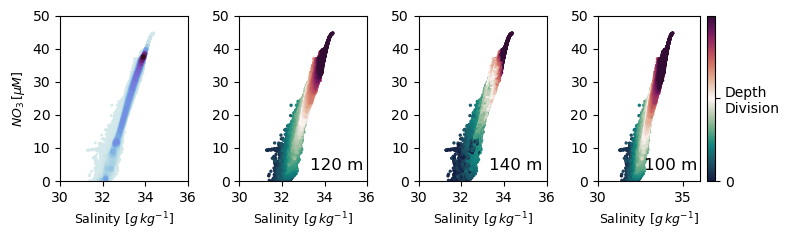

In [17]:
# and for downwelling 
fig, ax = plt.subplots(1,4, figsize=(8,2.5))
salt, temp, NO3, trans, depth = dwdata[dwdata.section == 3].salt.reset_index(drop=True), dwdata[dwdata.section == 3].temperature.reset_index(drop=True), dwdata[dwdata.section == 3].NO3.reset_index(drop=True), dwdata[dwdata.section == 3].transport.reset_index(drop=True), dwdata[dwdata.section == 3].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax[0].scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax[0].set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax[0].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[0].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[1].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=240)
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[1].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[1].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[2].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=280)
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[2].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[2].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by depth -20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[3].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax[3])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
cb.set_ticks([0,100])
cb.set_ticklabels(['0','Depth\nDivision'])
ax[3].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[3].set_xlim([np.min(bins[0]),np.max(bins[0])])


for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=9)

# add text about depth division to each plot
ax[1].text(.97, .05, '120 m', ha='right', va='bottom', transform=ax[1].transAxes, fontsize=12)
ax[2].text(.97, .05, '140 m', ha='right', va='bottom', transform=ax[2].transAxes, fontsize=12)
ax[3].text(.97, .05, '100 m', ha='right', va='bottom', transform=ax[3].transAxes, fontsize=12)


plt.tight_layout()

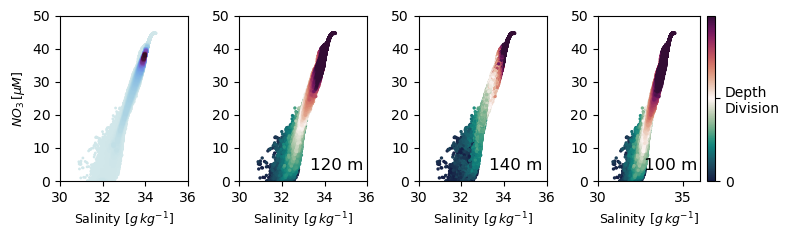

In [18]:
# and for upwelling 
fig, ax = plt.subplots(1,4, figsize=(8,2.5))
salt, temp, NO3, trans, depth = updata[updata.section == 3].salt.reset_index(drop=True), updata[updata.section == 3].temperature.reset_index(drop=True), updata[updata.section == 3].NO3.reset_index(drop=True), updata[updata.section == 3].transport.reset_index(drop=True), updata[updata.section == 3].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax[0].scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax[0].set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax[0].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[0].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[1].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=240)
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[1].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[1].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[2].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=280)
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[2].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[2].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by depth -20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax[3].scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax[3])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
cb.set_ticks([0,100])
cb.set_ticklabels(['0','Depth\nDivision'])
ax[3].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[3].set_xlim([np.min(bins[0]),np.max(bins[0])])


for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=9)

# add text about depth division to each plot
ax[1].text(.97, .05, '120 m', ha='right', va='bottom', transform=ax[1].transAxes, fontsize=12)
ax[2].text(.97, .05, '140 m', ha='right', va='bottom', transform=ax[2].transAxes, fontsize=12)
ax[3].text(.97, .05, '100 m', ha='right', va='bottom', transform=ax[3].transAxes, fontsize=12)


plt.tight_layout()

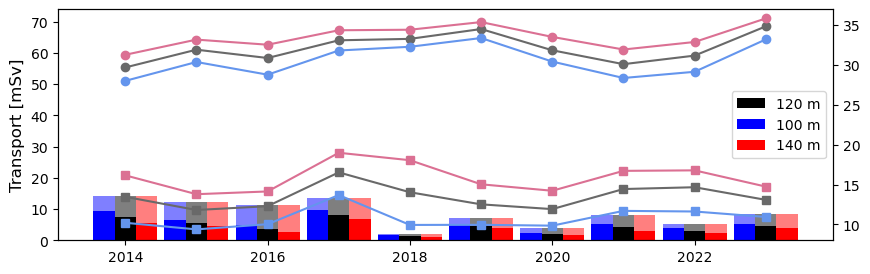

In [19]:
# annual transport from each watermass based on the depth divisions
# downwelling
years = np.sort(list(set(dw.year)))
deep = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120+20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120-20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120+20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120-20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

Sdeep = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120)&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120+20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120+20)&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120-20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120-20)&(dwdata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120)&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120+20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120+20)&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120-20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120-20)&(dwdata.year==years[i])]) for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='120 m')
ax.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='100 m')
ax.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='140 m')
ax.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

ax2=ax.twinx()
ax2.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
ax2.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
ax2.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

ax2.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
ax2.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
ax2.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
ax2.set_ylim([8,37])


# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.set_ylim([0,74])
ax.legend(loc='center right')

(0.0, 74.0)

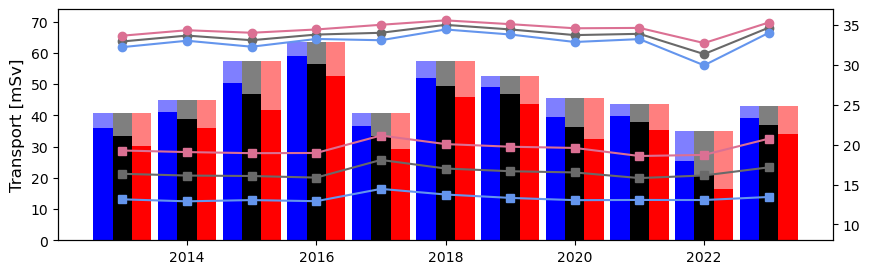

In [20]:
# annual transport from each watermass based on the depth divisions
# upwelling
years = np.sort(list(set(up.year)))
deep = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120+20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120+20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

Sdeep = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120)&(updata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120+20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120+20)&(updata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120-20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120-20)&(updata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120)&(updata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120+20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120+20)&(updata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120-20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120-20)&(updata.year==years[i])]) for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='120 m')
ax.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='100 m')
ax.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='140 m')
ax.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

ax2=ax.twinx()
ax2.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
ax2.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
ax2.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

ax2.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
ax2.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
ax2.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
ax2.set_ylim([8,37])


# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
# ax.legend()
ax.set_ylim([0,74])

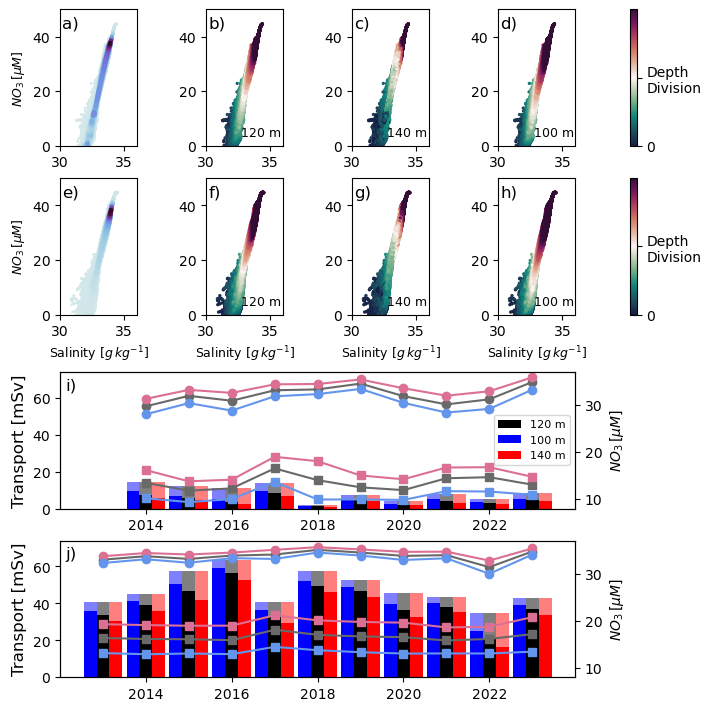

In [21]:
# all together now 
fig = plt.figure(constrained_layout=True, figsize=[7,7])
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[2, :])
ax10 = fig.add_subplot(gs[3, :])

##########
# NO3-SA #
##########

# DOWNWELLING
salt, NO3, trans, depth = dwdata[dwdata.section == 3].salt.reset_index(drop=True), dwdata[dwdata.section == 3].NO3.reset_index(drop=True), dwdata[dwdata.section == 3].transport.reset_index(drop=True), dwdata[dwdata.section == 3].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax1.scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax1.set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax1.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax1.set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax2.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=240)
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax2.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax2.set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax3.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=280)
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax3.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax3.set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth -20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax4.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax4)
cb.set_ticks([0,100])
cb.set_ticklabels(['0','Depth\nDivision'])
ax4.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax4.set_xlim([np.min(bins[0]),np.max(bins[0])])

#UPWELLING
salt, NO3, trans, depth = updata[updata.section == 3].salt.reset_index(drop=True), updata[updata.section == 3].NO3.reset_index(drop=True), updata[updata.section == 3].transport.reset_index(drop=True), updata[updata.section == 3].depth.reset_index(drop=True)

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax5.scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax5.set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax5.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax5.set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax6.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=240)
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax6.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax6.set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax7.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=280)
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax7.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax7.set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by depth -20 m
cmap = cm.cm.curl
idx = depth.argsort()
salt, NO3, depth = salt[idx], NO3[idx], depth[idx]
sc=ax8.scatter(salt,NO3,c=depth, cmap=cmap,s=2, vmin=0, vmax=200)
cb = fig.colorbar(sc, ax=ax8)
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
cb.set_ticks([0,100])
cb.set_ticklabels(['0','Depth\nDivision'])
ax8.set_ylim([np.min(bins[1]),np.max(bins[1])])
ax8.set_xlim([np.min(bins[0]),np.max(bins[0])])

for axs in [ax5,ax6,ax7,ax8]:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=9)

# add text about depth division to each plot
ax2.text(.98, .05, '120 m', ha='right', va='bottom', transform=ax2.transAxes, fontsize=9)
ax3.text(.98, .05, '140 m', ha='right', va='bottom', transform=ax3.transAxes, fontsize=9)
ax4.text(.98, .05, '100 m', ha='right', va='bottom', transform=ax4.transAxes, fontsize=9)
ax6.text(.98, .05, '120 m', ha='right', va='bottom', transform=ax6.transAxes, fontsize=9)
ax7.text(.98, .05, '140 m', ha='right', va='bottom', transform=ax7.transAxes, fontsize=9)
ax8.text(.98, .05, '100 m', ha='right', va='bottom', transform=ax8.transAxes, fontsize=9)

#######################
# Change in Transport #
#######################

# downwelling
years = np.sort(list(set(dw.year)))
deep = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120+20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth >120-20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120+20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.depth <= 120-20)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

ax9.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='120 m')
ax9.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax9.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='100 m')
ax9.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax9.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='140 m')
ax9.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

Sdeep = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120)&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120+20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120+20)&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth >120-20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth>120-20)&(dwdata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120)&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120+20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120+20)&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.depth <= 120-20)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.depth<=120-20)&(dwdata.year==years[i])]) for i in range(len(years))]

twin=ax9.twinx()
twin.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
twin.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
twin.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

twin.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
twin.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
twin.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
twin.set_ylim([8,37])
twin.set_ylabel('$NO_3 \, [\mu M]$')

ax9.set_ylabel('Transport [mSv]',fontsize=12)
ax9.set_ylim([0,74])
ax9.set_xlim([2012,2024])
ax9.set_xticks([2014,2016,2018,2020,2022])
ax9.legend(loc='center right',fontsize=8)

# upwelling

years = np.sort(list(set(up.year)))
deep = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120+20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(updata.transport[(updata.section == 3)&(updata.depth >120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120+20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

ax10.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='120 m')
ax10.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax10.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='100 m')
ax10.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax10.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='140 m')
ax10.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

Sdeep = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120)&(updata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120+20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120+20)&(updata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(updata.NO3[(updata.section == 3)&(updata.depth >120-20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth>120-20)&(updata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120)&(updata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120+20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120+20)&(updata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(updata.NO3[(updata.section == 3)&(updata.depth <= 120-20)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.depth<=120-20)&(updata.year==years[i])]) for i in range(len(years))]

twin=ax10.twinx()
twin.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
twin.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
twin.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

twin.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
twin.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
twin.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
twin.set_ylim([8,37])
twin.set_ylabel('$NO_3 \, [\mu M]$')

ax10.set_ylabel('Transport [mSv]',fontsize=12)
ax10.set_ylim([0,74])
ax10.set_xlim([2012,2024])
ax10.set_xticks([2014,2016,2018,2020,2022])


# add text
letters = ['a)','b)','c)','d)','e)','f)','g)','h)']
i=0
for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    ax.text(.03, .95, letters[i], ha='left', va='top', transform=ax.transAxes, fontsize=12)
    i+=1
ax9.text(.01, .85, 'i)', ha='left', va='bottom', transform=ax9.transAxes, fontsize=12)
ax10.text(.01, .85, 'j)', ha='left', va='bottom', transform=ax10.transAxes, fontsize=12)

plt.savefig('/data1/bbeutel/LO_user/ariane/figures/offshoresensitivity.png')

In [22]:
np.array(Sshal) - np.array(Sshalneg)

array([3.20479973, 3.23562757, 3.0227353 , 2.96193555, 3.63447535,
       3.26414703, 3.34774743, 3.47994431, 2.74627091, 3.08670485,
       3.71791445])

In [23]:
np.array(Sshalpls) - np.array(Sshal)

array([2.92582294, 2.94944905, 2.86571832, 3.09161362, 3.06560801,
       3.06620715, 3.07756626, 3.07602035, 2.77156954, 2.58051456,
       3.60222744])

In [24]:
# change between deep and shallow 
# during upwelling
# 100 versu 120 m 

deep = np.array([np.sum(updata.transport[(updata.section == 3)&(updata.depth >120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))])
deepneg = np.array([np.sum(updata.transport[(updata.section == 3)&(updata.depth >120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))])

shal = np.array([np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))])
shalneg = np.array([np.sum(updata.transport[(updata.section == 3)&(updata.depth <= 120-20)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))])

total = np.sum([deep,shal],axis=0)

print(np.mean(shal-shalneg))
print(np.mean(shal))
print(np.mean(deep))
print(np.mean(total))

2.798419664394884
7.900776758518318
39.778837296232574
47.679614054750886


### splitting offshore based on the 26.0 isopycnal

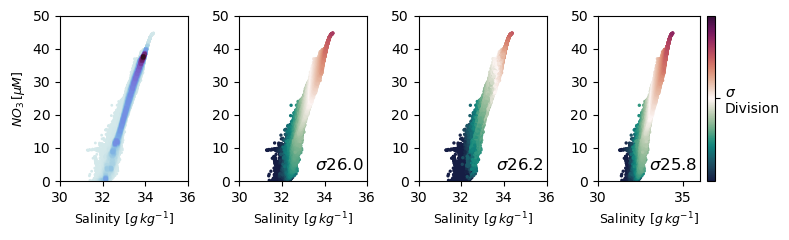

In [25]:
# and for downwelling 
salt, temp, NO3, trans, depth = dwdata[dwdata.section == 3].salt.reset_index(drop=True), dwdata[dwdata.section == 3].temperature.reset_index(drop=True), dwdata[dwdata.section == 3].NO3.reset_index(drop=True), dwdata[dwdata.section == 3].transport.reset_index(drop=True), dwdata[dwdata.section == 3].depth.reset_index(drop=True)
iso = gsw.density.sigma0(salt, gsw.conversions.CT_from_t(salt, temp, depth))

fig, ax = plt.subplots(1,4, figsize=(8,2.5))

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax[0].scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax[0].set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax[0].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[0].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by sigma
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[1].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=24, vmax=28) # centered at 26
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[1].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[1].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[2].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=24.2, vmax=28.2) # centered at 26.2
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[2].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[2].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by depth -20 m
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[3].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=23.8, vmax=27.8) # centered at 25.8
cb = fig.colorbar(sc, ax=ax[3])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
cb.set_ticks([25.8])
cb.set_ticklabels(['$\sigma$\nDivision'])
ax[3].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[3].set_xlim([np.min(bins[0]),np.max(bins[0])])


for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=9)

# add text about depth division to each plot
ax[1].text(.97, .05, '$\sigma 26.0$', ha='right', va='bottom', transform=ax[1].transAxes, fontsize=12)
ax[2].text(.97, .05, '$\sigma 26.2$', ha='right', va='bottom', transform=ax[2].transAxes, fontsize=12)
ax[3].text(.97, .05, '$\sigma 25.8$', ha='right', va='bottom', transform=ax[3].transAxes, fontsize=12)


plt.tight_layout()

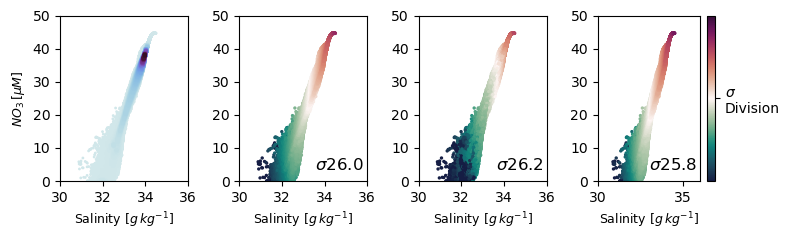

In [26]:
# and for upwelling
salt, temp, NO3, trans, depth = updata[updata.section == 3].salt.reset_index(drop=True), updata[updata.section == 3].temperature.reset_index(drop=True), updata[updata.section == 3].NO3.reset_index(drop=True), updata[updata.section == 3].transport.reset_index(drop=True), updata[updata.section == 3].depth.reset_index(drop=True)
iso = gsw.density.sigma0(salt, gsw.conversions.CT_from_t(salt, temp, depth))

fig, ax = plt.subplots(1,4, figsize=(8,2.5))

# first TS coloured by transport
bins = [np.linspace(30,36,100),np.linspace(0,50,100)]
data, x_e, y_e = np.histogram2d(salt,NO3, bins = bins, density = True, weights=trans)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,NO3]).T ,method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
salt, NO3, z = salt[idx], NO3[idx], z[idx]    
ax[0].scatter(salt,NO3, c=z, cmap=cm.cm.dense,s=1)
ax[0].set_ylabel('$NO_3 \,[\mu M$]', fontsize=9)
ax[0].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[0].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by sigma
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[1].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=24, vmax=28) # centered at 26
# cb = fig.colorbar(sc, ax=ax[1])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[1].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[1].set_xlim([np.min(bins[0]),np.max(bins[0])])

# then coloured by depth +20 m
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[2].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=24.2, vmax=28.2) # centered at 26.2
# cb = fig.colorbar(sc, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
ax[2].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[2].set_xlim([np.min(bins[0]),np.max(bins[0])])


# then coloured by depth -20 m
cmap = cm.cm.curl
idx = iso.argsort()
salt, NO3, iso = salt[idx], NO3[idx], iso[idx]
sc=ax[3].scatter(salt,NO3,c=iso, cmap=cmap,s=2, vmin=23.8, vmax=27.8) # centered at 25.8
cb = fig.colorbar(sc, ax=ax[3])
# cb.set_label('Depth [m]', labelpad=10, fontsize=10)
cb.set_ticks([25.8])
cb.set_ticklabels(['$\sigma$\nDivision'])
ax[3].set_ylim([np.min(bins[1]),np.max(bins[1])])
ax[3].set_xlim([np.min(bins[0]),np.max(bins[0])])


for axs in ax:
    axs.set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=9)

# add text about depth division to each plot
ax[1].text(.97, .05, '$\sigma 26.0$', ha='right', va='bottom', transform=ax[1].transAxes, fontsize=12)
ax[2].text(.97, .05, '$\sigma 26.2$', ha='right', va='bottom', transform=ax[2].transAxes, fontsize=12)
ax[3].text(.97, .05, '$\sigma 25.8$', ha='right', va='bottom', transform=ax[3].transAxes, fontsize=12)


plt.tight_layout()

In [27]:
dwdata['iso'] = gsw.density.sigma0(np.array(dwdata.salt), gsw.conversions.CT_from_t(np.array(dwdata.salt), np.array(dwdata.temperature), np.array(dwdata.depth)))
updata['iso'] = gsw.density.sigma0(np.array(updata.salt), gsw.conversions.CT_from_t(np.array(updata.salt), np.array(updata.temperature), np.array(updata.depth)))

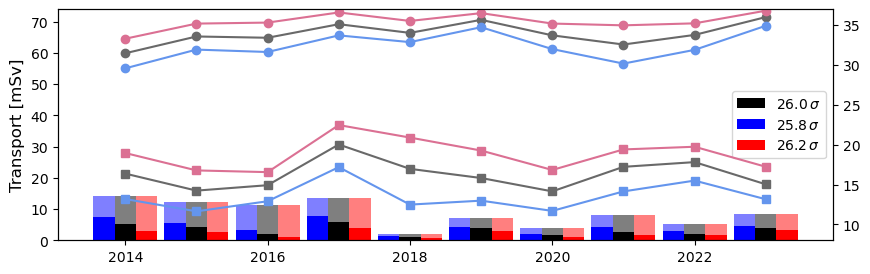

In [28]:
# annual transport from each watermass based on the depth divisions
# downwelling
years = np.sort(list(set(dw.year)))
deep = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso >26 )&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso >26 +0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso >26 -0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso <= 26 )&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso <= 26 +0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(dwdata.transport[(dwdata.section == 3)&(dwdata.iso <= 26 -0.2)&(dwdata.year == years[i])])/(ldw[i]*24)/1000 for i in range(len(years))]

Sdeep = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso >26 )&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso>26 )&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso >26 +0.2)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso>26 +0.2)&(dwdata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso >26 -0.2)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso>26 -0.2)&(dwdata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso <26 )&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso<26 )&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso <= 26 +0.2)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso<=26 +0.2)&(dwdata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(dwdata.NO3[(dwdata.section == 3)&(dwdata.iso <= 26 -0.2)&(dwdata.year == years[i])],
            weights=dwdata.transport[(dwdata.section==3)&(dwdata.iso<=26 -0.2)&(dwdata.year==years[i])]) for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='$26.0 \, \sigma$')
ax.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='$25.8 \, \sigma$')
ax.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='$26.2 \, \sigma$')
ax.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

ax2=ax.twinx()
ax2.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
ax2.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
ax2.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

ax2.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
ax2.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
ax2.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
ax2.set_ylim([8,37])


# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.set_ylim([0,74])
ax.legend(loc='center right')

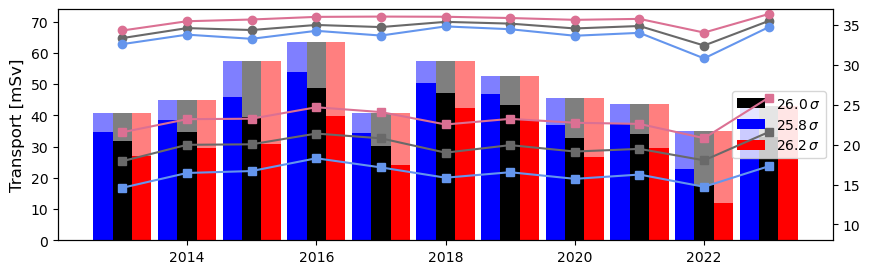

In [29]:
# annual transport from each watermass based on the depth divisions
# downwelling
years = np.sort(list(set(up.year)))
deep = [np.sum(updata.transport[(updata.section == 3)&(updata.iso >26 )&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deeppls = [np.sum(updata.transport[(updata.section == 3)&(updata.iso >26 +0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
deepneg = [np.sum(updata.transport[(updata.section == 3)&(updata.iso >26 -0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

shal = [np.sum(updata.transport[(updata.section == 3)&(updata.iso <= 26 )&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalpls = [np.sum(updata.transport[(updata.section == 3)&(updata.iso <= 26 +0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]
shalneg = [np.sum(updata.transport[(updata.section == 3)&(updata.iso <= 26 -0.2)&(updata.year == years[i])])/(lup[i]*24)/1000 for i in range(len(years))]

Sdeep = [np.average(updata.NO3[(updata.section == 3)&(updata.iso >26 )&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso>26 )&(updata.year==years[i])]) for i in range(len(years))]
Sdeeppls = [np.average(updata.NO3[(updata.section == 3)&(updata.iso >26 +0.2)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso>26 +0.2)&(updata.year==years[i])]) for i in range(len(years))]
Sdeepneg = [np.average(updata.NO3[(updata.section == 3)&(updata.iso >26 -0.2)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso>26 -0.2)&(updata.year==years[i])]) for i in range(len(years))]

Sshal = [np.average(updata.NO3[(updata.section == 3)&(updata.iso <26 )&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso<26 )&(updata.year==years[i])]) for i in range(len(years))]
Sshalpls = [np.average(updata.NO3[(updata.section == 3)&(updata.iso <= 26 +0.2)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso<=26 +0.2)&(updata.year==years[i])]) for i in range(len(years))]
Sshalneg = [np.average(updata.NO3[(updata.section == 3)&(updata.iso <= 26 -0.2)&(updata.year == years[i])],
            weights=updata.transport[(updata.section==3)&(updata.iso<=26 -0.2)&(updata.year==years[i])]) for i in range(len(years))]

fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.bar(years,deep,width=0.3,color='k',alpha=1,zorder=2,label='$26.0 \, \sigma$')
ax.bar(years,shal,width=0.3,color='k',alpha=0.5,bottom=deep,zorder=2)

ax.bar(years-0.3,deepneg,width=0.3,color='b',alpha=1,zorder=2,label='$25.8 \, \sigma$')
ax.bar(years-0.3,shalneg,width=0.3,color='b',alpha=0.5,bottom=deepneg,zorder=2)

ax.bar(years+0.3,deeppls,width=0.3,color='r',alpha=1,zorder=2,label='$26.2 \, \sigma$')
ax.bar(years+0.3,shalpls,width=0.3,color='r',alpha=0.5,bottom=deeppls,zorder=2)

ax2=ax.twinx()
ax2.plot(years,np.array(Sdeep),'dimgrey',marker='o',label='Deep')
ax2.plot(years,np.array(Sdeeppls),'palevioletred',marker='o')
ax2.plot(years,np.array(Sdeepneg),'cornflowerblue',marker='o')

ax2.plot(years,np.array(Sshal),'dimgrey',marker='s',label='Shallow')
ax2.plot(years,np.array(Sshalpls),'palevioletred',marker='s')
ax2.plot(years,np.array(Sshalneg),'cornflowerblue',marker='s')
ax2.set_ylim([8,37])


# ax.set_xticks(tick_spots)
# ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.set_ylim([0,74])
ax.legend(loc='center right')

In [43]:
# whats the average depth of the 26,25.8, and 26.2 isopycnal?

print("26.0: mean = {}, std = {}".format(np.mean(updata.depth[(updata.section == 3)&(updata.iso >25.999)&(updata.iso <26.001)]),np.std(updata.depth[(updata.section == 3)&(updata.iso >25.999)&(updata.iso <26.001)])))
print("25.8: mean = {}, std = {}".format(np.mean(updata.depth[(updata.section == 3)&(updata.iso >25.799)&(updata.iso <25.801)]),np.std(updata.depth[(updata.section == 3)&(updata.iso >25.799)&(updata.iso <25.801)])))
print("26.2: mean = {}, std = {}".format(np.mean(updata.depth[(updata.section == 3)&(updata.iso >26.199)&(updata.iso <26.201)]),np.std(updata.depth[(updata.section == 3)&(updata.iso >26.199)&(updata.iso <26.201)])))

26.0: mean = 143.0876053382634, std = 14.195985614033521
25.8: mean = 120.71677285326028, std = 13.660994574073952
26.2: mean = 172.69545479054207, std = 16.62241083827859
